**Topic:**        Challenge Set 5  
**Subject:**      Linear Regression and Train/Test Split challenges  
**Date:**         01/29/2018  
**Name:**         Arina Igumenshcheva  
**Worked with:**  N/A  

In [65]:
# Import all the python library things!
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import re

In [2]:
# Import the movies data
filepath = 'https://raw.githubusercontent.com/33eyes/nyc18_ds14/master/challenges/challenges_data/2013_movies.csv?token=ANE-v-MauItGvS7Y5l5d8R09FhJo3z-Bks5aeZN3wA%3D%3D'
movies_df = pd.read_csv(filepath,
        parse_dates =['ReleaseDate'])

movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [85]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
rating_G              100 non-null uint8
rating_PG             100 non-null uint8
rating_PG13           100 non-null uint8
rating_R              100 non-null uint8
log_budget            89 non-null float64
title_length          100 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3), uint8(4)
memory usage: 7.5+ KB


### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [3]:
# Create feature matrix X and target vector y
y, X = patsy.dmatrices('DomesticTotalGross ~ 1', data=movies_df, return_type="dataframe")

In [4]:
# Create OLS model
model = sm.OLS(y, X)
# Fit the model to the training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

C:\Users\Arina\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        21:55:17   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
fit.fittedvalues.head()

0    1.005969e+08
1    1.005969e+08
2    1.005969e+08
3    1.005969e+08
4    1.005969e+08
dtype: float64

The results of this model can be interpreted as the exprected value of Domestic Total Gross when all other factors are 0. This is also the average value of Domestic Total Gross. This model predicts that Domestic Total Gross is $100,596,900, which is just the average value.

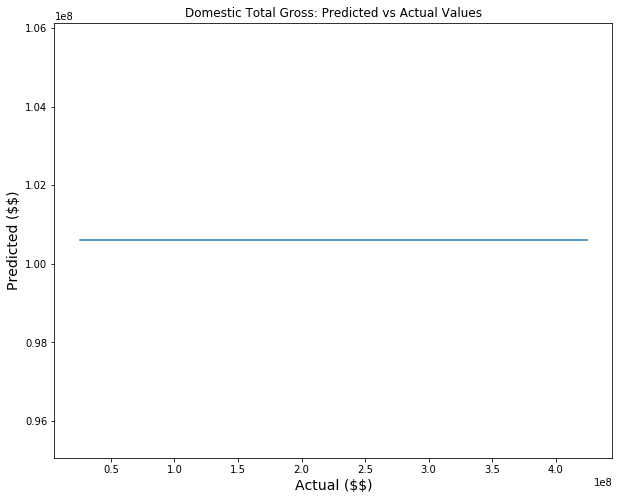

In [6]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y,fit.fittedvalues);

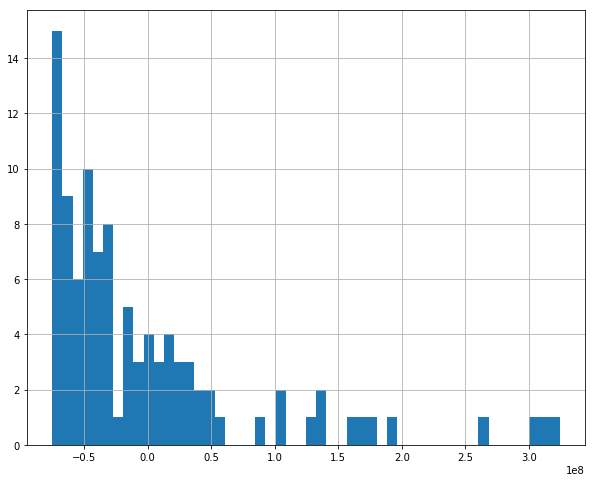

In [7]:
# Histogram of residuals
fit.resid.hist(figsize=(10,8), bins=50);

The residuals are highly skewed, showing that the predicted value underestimates a lot of actual values.

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [8]:
# Create feature matrix X and target vector y
y2, X2 = patsy.dmatrices('DomesticTotalGross ~ Budget', data=movies_df, return_type="dataframe")

# Create OLS model
model2 = sm.OLS(y2, X2)
# Fit the model to the training set
fit2 = model2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        21:57:41   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

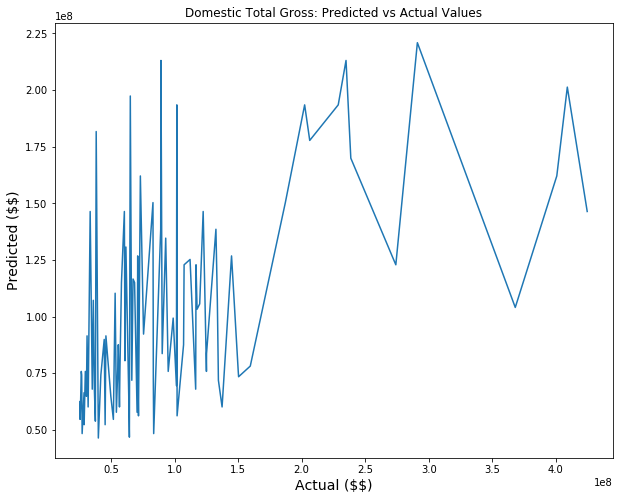

In [9]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y2,fit2.fittedvalues);

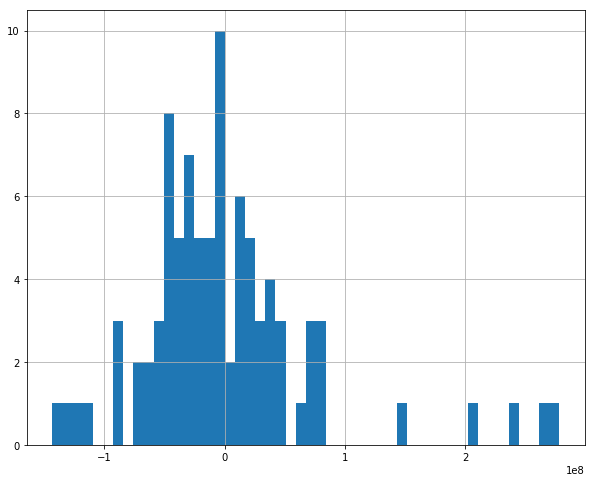

In [10]:
# Histogram of residuals
fit2.resid.hist(figsize=(10,8), bins=50);

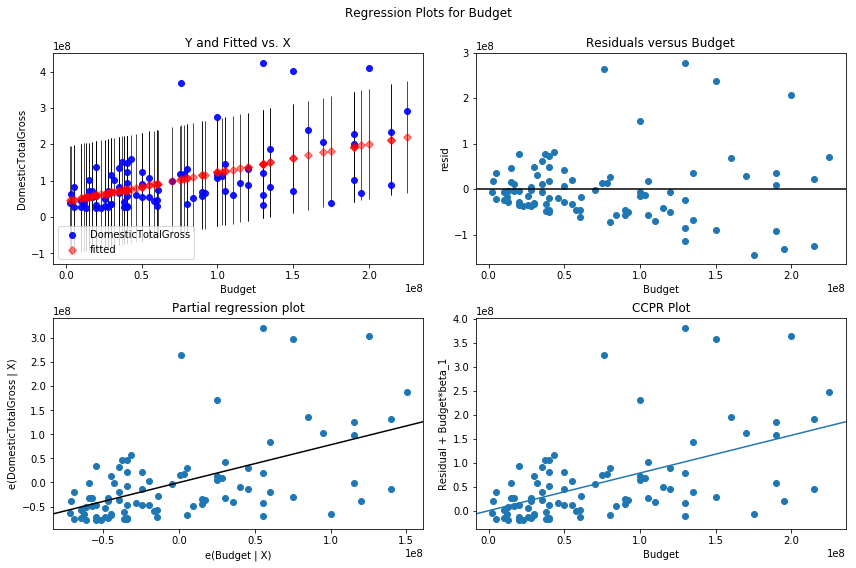

In [11]:
# Plots of model predictions against feature variable, and of residuals against feature variable
# (along with a couple more plots)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fit2, "Budget", fig=fig)

The residuals are now a lot less skewed and a starting to resemple the normal distribution. Both the model overall and the coefficient of Budget have p-values less than 5%, so the model and the effect of Budget on total gross income are statisticaally significant. This means that adding Budget to our model improved its predictive power, and was a good idea. But the model only explains about 28.6% of the variation we see in the data, which suggests that we should try adding more features to the model.

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [14]:
# Let's make dummy variables out of Ratings
movies_df['Rating'].unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [21]:
rating_dummies_df = pd.get_dummies(movies_df['Rating'], prefix='rating')

In [24]:
movies_df = pd.concat([movies_df, rating_dummies_df], axis=1)

In [30]:
movies_df.rename(columns={'rating_PG-13':'rating_PG13'}, inplace=True)

In [31]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,rating_G,rating_PG,rating_PG13,rating_R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,0,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,0,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,0,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,0,0,1,0


In [46]:
# Create feature matrix X and target vector y
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Budget + rating_PG + rating_PG13 + rating_R', data=movies_df, return_type="dataframe")

# Create OLS model
model3 = sm.OLS(y3, X3)
# Fit the model to the training set
fit3 = model3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.87e-06
Time:                        23:10:24   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.551e+07   1.09e+07      3.270      0.002    1.39e+07    5.71e+07
Budget          0.7816      0.152      5.157      0.000       0.480       1.083
rating_PG    2.221e+07   1.61e+07      1.380      0.171    -9.8e+06    5.42e+07
rating_PG13  4.946e+06   1.21e+07      0.410      0.683   -1.91e+07     2.9e+07
rating_R     8.347e+06   1.16e+07      0.719      0.474   -1.47e+07    3.14e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     8.96e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

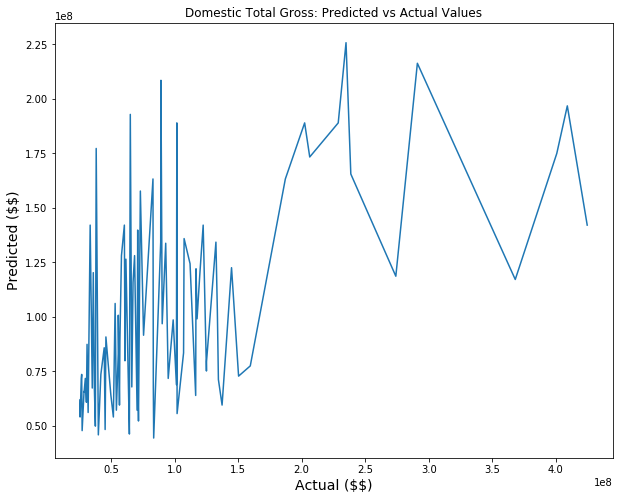

In [47]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y3,fit3.fittedvalues);

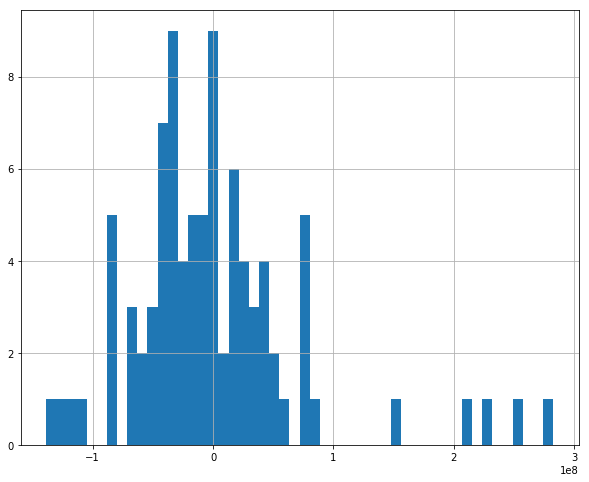

In [48]:
# Histogram of residuals
fit3.resid.hist(figsize=(10,8), bins=50);

In [40]:
movies_df['rating_G'].value_counts()

0    99
1     1
Name: rating_G, dtype: int64

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

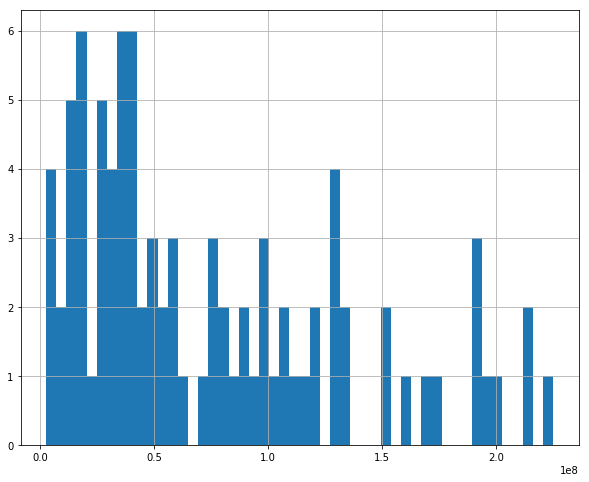

In [55]:
# Plot histograms of Budget and Runtime to see if they should be transformed
movies_df['Budget'].hist(figsize=(10,8), bins=50);

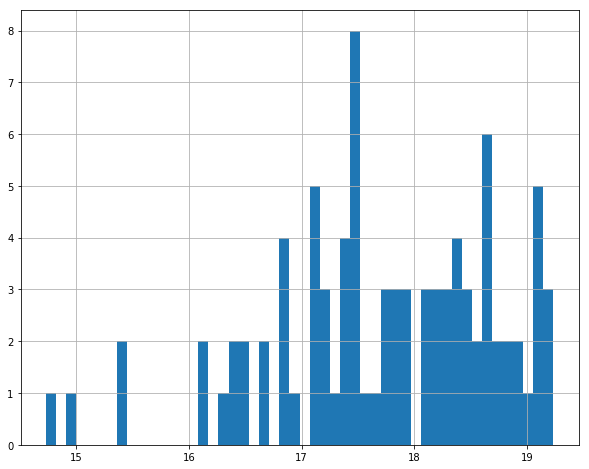

In [56]:
np.log(movies_df['Budget']).hist(figsize=(10,8), bins=50);

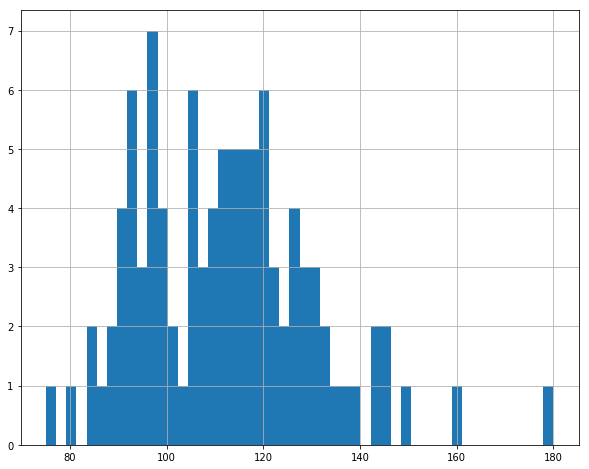

In [52]:
movies_df['Runtime'].hist(figsize=(10,8), bins=50);

In [90]:
# Let's try the total number of director credits on the movie
#movies_df['directors_count'] = 
#movies_df['Director'].str.match('[A-Z][a-z]')
movies_df['Director'].unique()

array(['Francis Lawrence', 'Shane Black', 'Chris BuckJennifer Lee',
       'Pierre CoffinChris Renaud', 'Zack Snyder', 'Alfonso Cuaron',
       'Dan Scanlon', 'Peter Jackson', 'Justin Lin', 'Sam Raimi',
       'J.J. Abrams', 'Alan Taylor', 'Marc Forster',
       'Kirk De MiccoChris Sanders', 'Paul Feig',
       'Rawson Marshall Thurber', 'David O. Russell', 'Baz Luhrmann',
       'James Wan', 'Seth Gordon', 'Dennis Dugan', 'James Mangold',
       'Adam McKay', 'Peter Berg', 'Jon Chu', nan, 'Louis Leterrier',
       'Martin Scorsese', 'Lee Daniels', 'Todd Phillips', 'Chris Wedge',
       'Paul Greengrass', 'Jeff Tremaine', 'Guillermo del Toro',
       'Evan GoldbergSeth Rogen', 'Antoine Fuqua', 'Brian Helgeland',
       'Neill Blomkamp', 'Klay Hall', 'Gore Verbinski', 'Joseph Kosinski',
       'John Lee Hancock', 'David Soren', 'Baltasar Kormakur',
       'Roland Emmerich', 'Andres Muschietti', 'Lasse Hallstrom',
       'Raja Gosnell', 'Malcolm D. Lee', 'Thor Freudenthal', 'John Moore',

In [97]:
# Remove obs with missing Director values
movies_df = movies_df[pd.notnull(movies_df.Director)]

In [78]:
# If multiple directors on a movie, then the director credits were added.
# Director credits source: IMDB
# Director credits counts prior to 2013
def director_credits(director):
    director_credits_dict = {'Francis Lawrence':46, 'Shane Black':1, 'Chris BuckJennifer Lee':3,
       'Pierre CoffinChris Renaud':9, 'Zack Snyder':8, 'Alfonso Cuaron':13,
       'Dan Scanlon':2, 'Peter Jackson':17, 'Justin Lin':12, 'Sam Raimi':30,
       'J.J. Abrams':11, 'Alan Taylor':29, 'Marc Forster':10,
       'Kirk De MiccoChris Sanders':3, 'Paul Feig':16,
       'Rawson Marshall Thurber':6, 'David O. Russell':9, 'Baz Luhrmann':13,
       'James Wan':7, 'Seth Gordon':12, 'Dennis Dugan':36, 'James Mangold':12,
       'Adam McKay':14, 'Peter Berg':15, 'Jon Chu':9, 'Louis Leterrier':5,
       'Martin Scorsese':52, 'Lee Daniels':3, 'Todd Phillips':12, 'Chris Wedge':5,
       'Paul Greengrass':16, 'Jeff Tremaine':11, 'Guillermo del Toro':10,
       'Evan GoldbergSeth Rogen':0, 'Antoine Fuqua':15, 'Brian Helgeland':5,
       'Neill Blomkamp':10, 'Klay Hall':7, 'Gore Verbinski':9, 'Joseph Kosinski':1,
       'John Lee Hancock':6, 'David Soren':1, 'Baltasar Kormakur':8,
       'Roland Emmerich':16, 'Andres Muschietti':3, 'Lasse Hallstrom':66,
       'Raja Gosnell':8, 'Malcolm D. Lee':7, 'Thor Freudenthal':9, 'John Moore':6,
       'Jonathan Levine':6, 'Bryan Singer':11, 'James DeMonaco':1,
       'Jon Turteltaub':16, 'Gavin Hood':9, 'Denis Villeneuve':11,
       'M. Night Shyamalan':9, 'Ben Stiller':13, 'Cal Brunker':1,
       'Steve McQueen (II)':25, 'Jimmy Hayward':2, 'Tommy Wirkola':4,
       'Fede Alvarez':4, 'Dean Parisot':29, 'Tyler Perry':27, 'Brad Anderson':23,
       'Michael Bay':50, 'Ruben Fleischer':14, 'Shawn Levy':31, 'Ric Roman Waugh':3,
       'David Twohy':7, 'Michael Tiddes':3, 'Carl Rinsch':3, 'John Wells':4,
       'Stephen Frears':55, 'Luc Besson':24, 'Barry CookNeil Nightingale':6,
       'Kimberly Peirce':5, 'John Luessenhop':3, 'Robert Schwentke':7,
       'Woody Allen':47, 'Steven Soderbergh':34, 'Harald Zwart':14, 'Ken Scott':2,
       'Peter Segal':17, 'Morgan Spurlock':10, 'Jeff Wadlow':5, 'Jean-Marc Vallee':10,
       'Ron Howard':31, 'Andrew Niccol':5, 'Edgar Wright':18,
       'Jon LucasScott Moore':0, 'Spike Jonze':91}
    return director_credits_dict[director]

In [99]:
movies_df['director_credits'] = movies_df['Director'].apply(lambda d: director_credits(d))

In [100]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,rating_G,rating_PG,rating_PG13,rating_R,log_budget,title_length,director_credits
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,0,1,0,18.683045,31,46
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,0,0,1,0,19.113828,10,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,0,1,0,0,18.826146,6,3
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,0,1,0,0,18.146244,15,9
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,0,0,1,0,19.231611,12,8


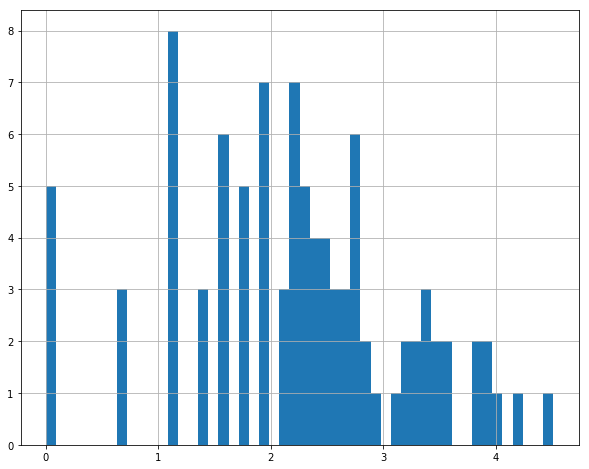

In [105]:
movies_df['log_director_credits'] = movies_df['director_credits'].apply(np.log)
movies_df2 = movies_df[movies_df.director_credits != 0]
movies_df2['log_director_credits'].hist(figsize=(10,8), bins=50);

In [49]:
# Create feature matrix X and target vector y
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Budget + rating_PG + rating_PG13 + rating_R + Runtime', data=movies_df, return_type="dataframe")

# Create OLS model
model4 = sm.OLS(y4, X4)
# Fit the model to the training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           3.77e-06
Time:                        23:14:29   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.012e+07   4.05e+07     -0.250      0.803   -9.08e+07    7.05e+07
Budget          0.7036      0.165      4.255      0.000       0.375       1.032
rating_PG    1.438e+07   1.74e+07      0.826      0.411   -2.02e+07     4.9e+07
rating_PG13 -1.342e+07   1.98e+07     -0.677      0.500   -5.28e+07     2.6e+07
rating_R    -1.109e+07   2.03e+07     -0.547      0.586   -5.14e+07    2.92e+07
Runtime      6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     7.84e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
# Create feature matrix X and target vector y
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Budget + rating_PG + rating_PG13 + rating_R + Runtime + log_director_credits', data=movies_df2, return_type="dataframe")

# Create OLS model
model4 = sm.OLS(y4, X4)
# Fit the model to the training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     6.611
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.45e-05
Time:                        17:05:39   Log-Likelihood:                -1660.7
No. Observations:                  85   AIC:                             3333.
Df Residuals:                      79   BIC:                             3348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.042e+07   4.24e+07     -0.246      0.807   -9.48e+07     7.4e+07
Budget                   0.6907      0.176      3.927      0.000       0.341       1.041
rating_PG             1.395e+07   1.85e+07      0.752      0.454   -2.29e+07    5.08e+07
rating_PG13          -1.277e+07   2.05e+07     -0.623      0.535   -5.35e+07     2.8e+07
rating_R              -1.16e+07   2.17e+07     -0.535      0.594   -5.48e+07    3.16e+07
Runtime               6.603e+05   5.77e+05      1.144      0.256   -4.89e+05    1.81e+06
log_director_credits -2.117e+06   9.54e+06     -0.222      0.825   -2.11e+07    1.69e+07
==============================================================================
Omnibus:                       34.510   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.387
Skew:                           1.500   Prob(JB):                     1.91e-16
Kurtosis:                       6.382   Cond. No.                     1.71e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.